## ✏️ Frame the Problem

This dataset, which contains information from the 1990 California census, is used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The goal of this notebook is to experiment using different regularization Linear Regression models (e. `Ridge Regression`, `Lasso Regression`, & `Elastic Net`) with different Gradient Descent methods (e.g `Batch`, `SGD`, `Mini-Batch` ect).

## ☀️ Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 💾 Load The Data

In [2]:
data_file_path = "/kaggle/input/california-housing-prices/housing.csv"

df = pd.read_csv(data_file_path)

df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Examine how many attributes are missing.

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## 📊 EDA

In [92]:
df_copy = df.copy(deep=True)

### Which features have the strongest correlation?

In [8]:
corr_matrix = df_copy.corr(numeric_only=True)

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: >

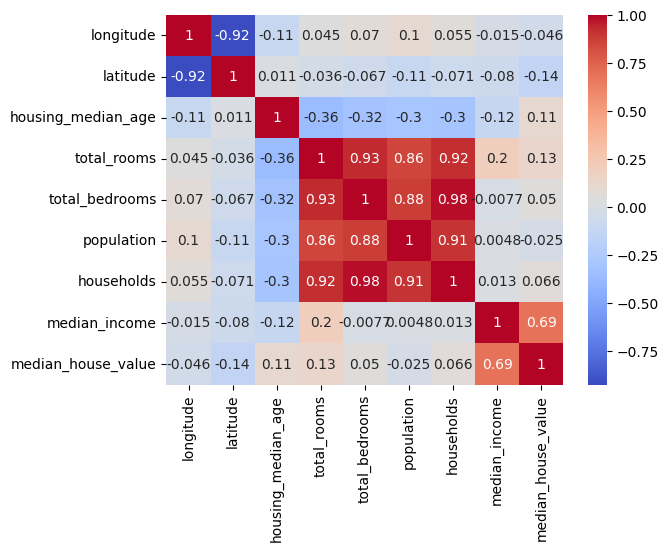

In [25]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", )

### Median House Value (Label)

In [9]:
df_copy['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='Count'>

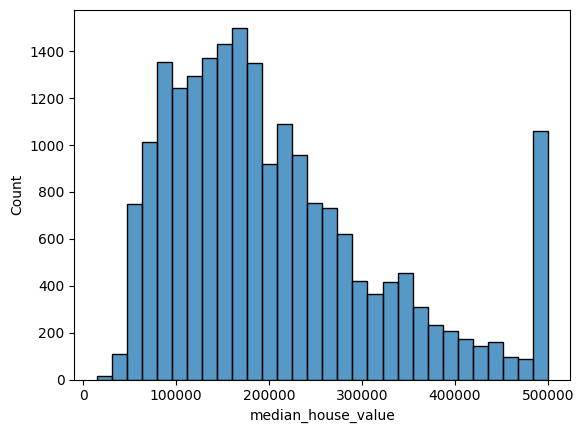

In [10]:
sns.histplot(data=df_copy, x="median_house_value", bins=30)

#### How many houses are capped at 500,001?

In [18]:
len(df_copy[df_copy["median_house_value"] == 500001])

965

### Total Bedrooms

<Axes: xlabel='total_bedrooms', ylabel='median_house_value'>

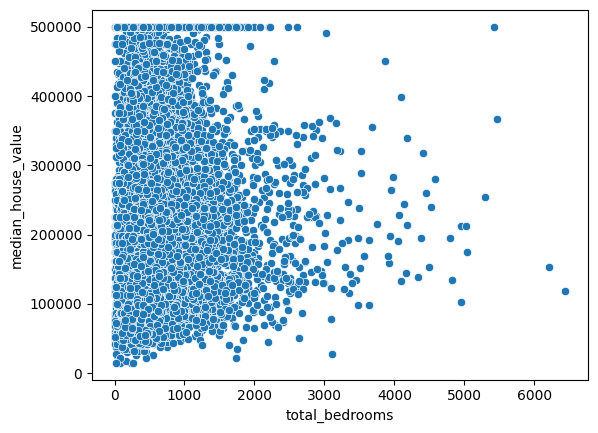

In [25]:
sns.scatterplot(data=df_copy, x="total_bedrooms", y="median_house_value")

#### Examine rows where total bedrooms is missing so we can fill the dataset.

In [8]:
df_without_bedrooms = df_copy[df_copy["total_bedrooms"].isnull() == True]

df_with_bedrooms = df_copy[df_copy["total_bedrooms"].isnull() == False]

<Axes: xlabel='total_rooms', ylabel='Count'>

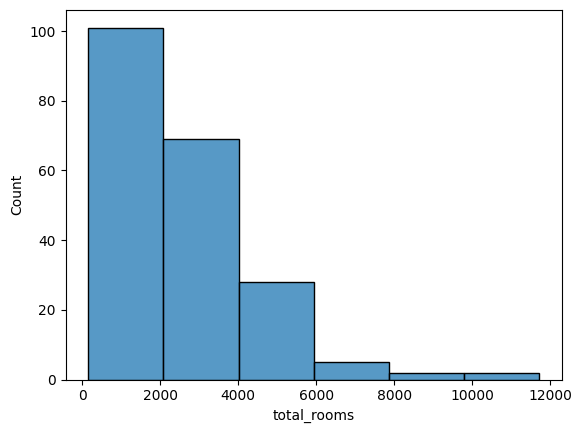

In [49]:
sns.histplot(data=df_without_bedrooms, x="total_rooms", bins=6)

In [10]:
total_rooms_2000 = df_with_bedrooms[df_with_bedrooms["total_rooms"].between(0,2000)]["total_bedrooms"].median()
total_rooms_4000 = df_with_bedrooms[df_with_bedrooms["total_rooms"].between(2000,4000)]["total_bedrooms"].median()
total_rooms_6000 = df_with_bedrooms[df_with_bedrooms["total_rooms"].between(4000,6000)]["total_bedrooms"].median()
total_rooms_8000 = df_with_bedrooms[df_with_bedrooms["total_rooms"].between(6000,8000)]["total_bedrooms"].median()
total_rooms_max = df_with_bedrooms[df_with_bedrooms["total_rooms"] > 8000]["total_bedrooms"].median()

print(total_rooms_2000)
print(total_rooms_4000)
print(total_rooms_6000)
print(total_rooms_8000)
print(total_rooms_max)

def impute_bedrooms(columns):
    bedrooms = columns[0]
    rooms = columns[1]
    
    if pd.isnull(bedrooms):
        if rooms <= 2000:
            return total_rooms_2000
        elif rooms <= 4000:
            return total_rooms_4000
        elif rooms <= 6000:
            return total_rooms_6000
        elif rooms <= 8000:
            return total_rooms_8000
        elif rooms > 8000:
            return total_rooms_max
    else:
        return bedrooms
        
df_copy["total_bedrooms"] = df_copy[["total_bedrooms", "total_rooms"]].apply(impute_bedrooms, axis=1)

286.0
539.0
902.0
1268.5
1914.0


In [17]:
df_copy.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Feature Engineering : Average Bedrooms per Total Rooms

In [19]:
df_copy["bedrooms_per_rooms"] = df_copy["total_bedrooms"] / df_copy["total_rooms"]

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


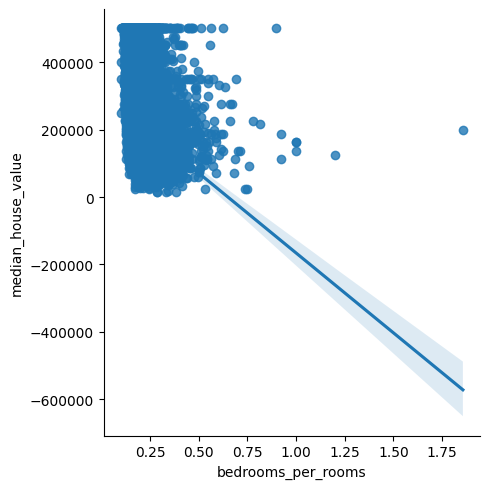

In [20]:
sns.lmplot(data=df_copy, x="bedrooms_per_rooms", y="median_house_value")

In [21]:
corr_matrix = df_copy.corr(numeric_only=True)

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.051008
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_per_rooms   -0.247224
Name: median_house_value, dtype: float64

### Feature Engineering : Rooms per Household

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


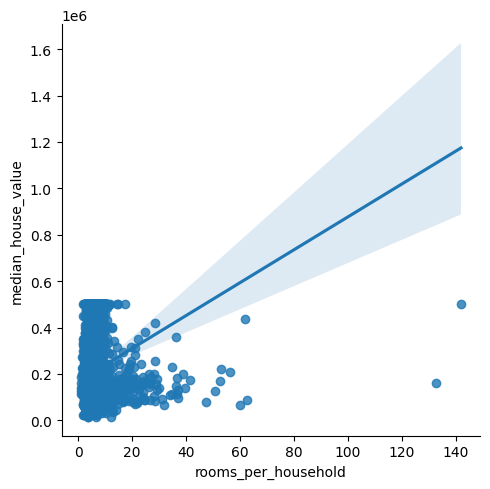

In [23]:
df_copy["rooms_per_household"] = df_copy["total_rooms"] / df_copy["households"]

sns.lmplot(data=df_copy, x="rooms_per_household", y="median_house_value")

In [24]:
corr_matrix = df_copy.corr(numeric_only=True)

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.051008
population            -0.024650
longitude             -0.045967
latitude              -0.144160
bedrooms_per_rooms    -0.247224
Name: median_house_value, dtype: float64

#### Latitude & Longitude

<Axes: xlabel='longitude', ylabel='latitude'>

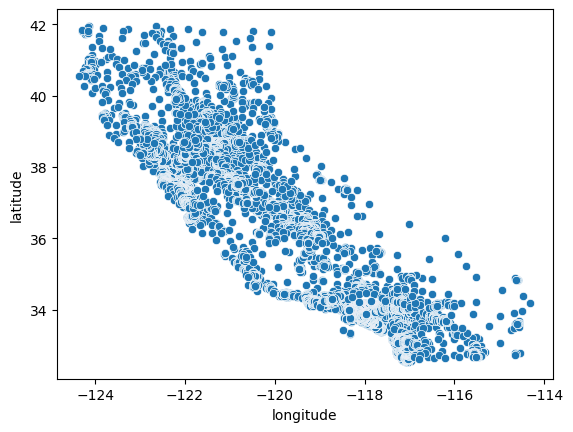

In [11]:
sns.scatterplot(data=df_copy, x="longitude", y="latitude")

### Median Income

In [12]:
df_copy['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

<Axes: xlabel='median_income', ylabel='Count'>

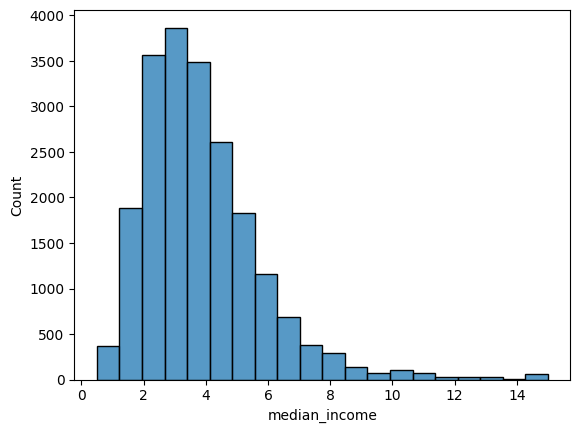

In [13]:
sns.histplot(data=df_copy, x="median_income", bins=20)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


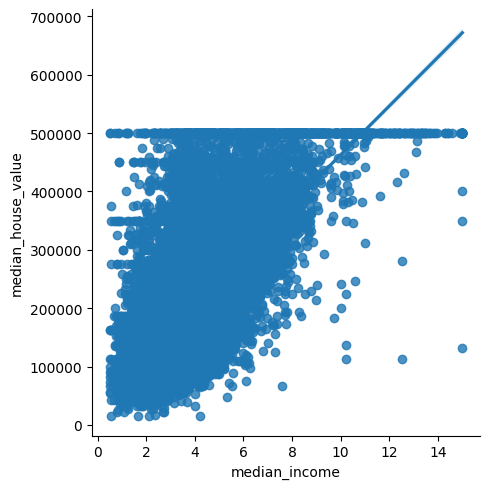

In [14]:
sns.lmplot(data=df_copy, x="median_income", y="median_house_value")

#### Ocean Proximity

In [15]:
df_copy["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


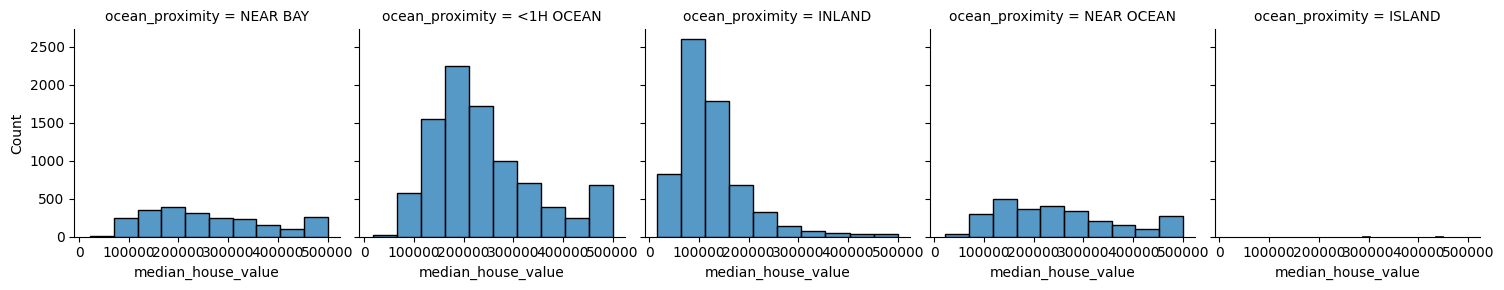

In [16]:
g = sns.FacetGrid(df_copy, col="ocean_proximity")

g.map(sns.histplot, "median_house_value", bins=10)

#### Conclusions

1. There is a mostly linear relationship between median income & median house price (target label). This is also supported by our correlation matrix, as `median_income` was the feature with the highest correlation to `median_house_value`.
2. There is a cap at around 500,000 for `median_house_value` in our dataset. It might be worthwhile to remove them so we don't set an upper bound limit.
3. The columns we featured engineered (`rooms_per_household` & `rooms_per_household`) have stronger correlations w/ `median_house_value` than `total_bedrooms` or `total_rooms` respectively. 

## 🧑🏻‍💻 Prepare Data Prepare

### Given median imcome is the feature w/ the highest correlation in predicting housing prices, we are going to use that feature to stratify our dataset so there is equal represenation of each income group in the training & test sets.

In [3]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1,2,3,4,5])

print("Distribution of Income Categories:")
df["income_cat"].value_counts() / len(df)

Distribution of Income Categories:


income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

df.drop

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

print("Distribution of Income Categories (Training):")
print(f'{strat_train_set["income_cat"].value_counts() / len(strat_train_set)}')
print("---")
print("Distribution of Income Categories (Test):")
print(f'{strat_test_set["income_cat"].value_counts() / len(strat_test_set)}')

Distribution of Income Categories (Training):
income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
---
Distribution of Income Categories (Test):
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [5]:
# Drop feature after categorizing income categories
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [121]:
strat_train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   
...           ...         ...            ...                 ...   
15174      2026.0      1001.0         5.0900            268500.0   
12661      4769.0      1418.0         2.8139             90400.0   
19263       458.0       172.0         3.1797            140400.0   
19140      1208.0       501.0         4.1964            258100.0   
19773       625.0       197.0         3.1319             62700.0   

      ocean_proximity  
12655          INLAND  
15502      NEAR OCEAN  
2908           INLAND  
14053      NEAR OCEAN  
20496       <1H OCEAN  
...               ...  
15174       <1H OCEAN  
12661          INLAND  
19263       <1H OCEAN  
19140       <1H OCEAN  
19773          INLAND  

[16512 rows x 10 columns]

### Custom Transformers

* Fill Missing Bedrooms
* Create Feature Categories

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

class BedroomsImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print("Initializing 'BedroomsImputer'")
        
    def fit(self, X , y=None):
        self.total_rooms_2000 = X[X["total_rooms"].between(0,2000)]["total_bedrooms"].median()
        self.total_rooms_4000 = X[X["total_rooms"].between(2000,4000)]["total_bedrooms"].median()
        self.total_rooms_6000 = X[X["total_rooms"].between(4000,6000)]["total_bedrooms"].median()
        self.total_rooms_8000 = X[X["total_rooms"].between(6000,8000)]["total_bedrooms"].median()
        self.total_rooms_max = X[X["total_rooms"] > 8000]["total_bedrooms"].median()
        return self
    
    def impute_values(self, columns):
        bedrooms = columns[0]
        rooms = columns[1]

        if pd.isnull(bedrooms):
            if rooms <= 2000:
                return self.total_rooms_2000
            elif rooms <= 4000:
                return self.total_rooms_4000
            elif rooms <= 6000:
                return self.total_rooms_6000
            elif rooms <= 8000:
                return self.total_rooms_8000
            elif rooms > 8000:
                return self.total_rooms_max
        else:
            return bedrooms
        
    def transform(self, X, y=None):
        X["total_bedrooms"] = X[["total_bedrooms", "total_rooms"]].apply(self.impute_values, axis=1)
        X["rooms_per_household"] = X["total_rooms"] / X["households"]

        return X

In [7]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        print("Initializing 'CombinedAttributesAdder'")
        
    def fit(self, X , y=None):
        return self
    
    def transform(self, X):
        X["bedrooms_per_rooms"] = X["total_bedrooms"] / X["total_rooms"]
        X["rooms_per_household"] = X["total_rooms"] / X["households"]

        return X

In [35]:
class DropAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, attribs_to_drop):
        self.attribs_to_drop = attribs_to_drop
        
    def fit(self, X , y=None):
        return self
    
    def transform(self, X):
        return np.delete(X, self.attribs_to_drop, 1)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

# Split data into X & Y.
X = strat_train_set.drop("median_house_value", axis=1)
y = strat_train_set["median_house_value"].copy()

# Split mumerical from categorical attributes for preprocessing & features to drop.
num_attribs = list(X.drop("ocean_proximity", axis=1))
num_attribs_drop = [X.columns.get_loc(col) for col in ["total_bedrooms", "population"]]

text_attribs = ["ocean_proximity"]
text_attribs_drop = [X.columns.get_loc(col) for col in ["ocean_proximity"]]

# Setup Numerical Pipeline
num_pipeline = Pipeline([
    ("bedrooms_imputer", BedroomsImputer()),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
    ("drop_features", DropAttributes(attribs_to_drop=num_attribs_drop))
])

# Setup Text Pipeline
text_pipeline = Pipeline([
    ("one_hot_encode", OneHotEncoder()),
])

# Setup 
pipeline = ColumnTransformer([
    ("num_preprocess", num_pipeline, num_attribs),
    ("text_preprocess", text_pipeline, text_attribs),
])

X_prepared = pipeline.fit_transform(X)

Initializing 'BedroomsImputer'
Initializing 'CombinedAttributesAdder'
Initializing 'BedroomsImputer'
Initializing 'CombinedAttributesAdder'
[[-0.94135046  1.34743822  0.02756357 ... -0.8936472   0.01739526
  -0.12471902]
 [ 1.17178212 -1.19243966 -1.72201763 ...  1.292168    0.56925554
  -0.87595342]
 [ 0.26758118 -0.1259716   1.22045984 ... -0.52543365 -0.01802432
  -0.36122827]
 ...
 [-1.5707942   1.31001828  1.53856552 ... -0.36547546 -0.5092404
   0.3588529 ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.16826095  0.32814891
  -0.49056479]
 [-1.28105026  2.02567448 -0.13148926 ... -0.390569    0.01407228
  -0.12534524]]


### 💻 Select & Train Models

In [23]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print(f"Mean: ${scores.mean()}")
    print(f"Standard Deviation: ${scores.std()}")

### Linear Regression

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Mean: $71085.81931808051
Standard Deviation: $2822.392328800581


### Stochastic Gradient Descent

**Advantages**:
- Computes gradient descent on a single random instance of the training set for each step, which it makes it able to process & train large datasets efficiently.

**Disadvantages**:
- Becuase it computes gradient descent one instance at a time, it makes the cost function very irregular - it tends to bounce up and down & decreases only on average.

In [21]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{
    "max_iter": [1000,2000,3000,4000], # Runs for 1000 epochs
    "penalty": [None, "l1","l2", "elasticnet"], # Add Ridge, Lasso, or Elasticnet Regularization
    "tol": [1e-3], # Runs for 1000 iterations or until the loss function drops by 0.001 during one iteraction (e.g epoch)
    "eta0": [0.1, 0.2, 0.3, 0.4, 0.5] # Learning Rate
}]

sgd_reg = SGDRegressor()

grid_search = GridSearchCV(sgd_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_prepared, y)

grid_search.best_params_

{'eta0': 0.1, 'max_iter': 1000, 'penalty': None, 'tol': 0.001}

In [22]:
sgd_reg = SGDRegressor(max_iter=1000, tol=0.001, penalty=None, eta0=0.1)

scores = cross_val_score(sgd_reg, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [82709.74312723 68127.14973557 67968.15849801 74675.22584022
 72400.57575272 75399.45107011 76235.36855284 75480.58344407
 69412.43117161 73295.93300109]
Mean: $73570.46201934706
Standard Deviation: $4226.004352333775


### Ridge Regression

Ridge Regression is a regularized version of `Linear Regression` where a regulaization term is added to the cost function, which forces the algo to not overfit the data but also keep the models weights as small as possible. Once the model is trained, you want to use the unregularized performance measure to evaluate the models performance.

If the regularization term is close to 0, then Ridge Regression is just Linear Regression. If the regularization term is very large, then all weights up close to 0 and the result is a flat line going through the data's mean.

In [25]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")

scores = cross_val_score(ridge_reg, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores)

display_scores(ridge_rmse_scores)

Mean: $71086.75599408576
Standard Deviation: $2813.1504096663175


### Lasso Regression

Lasso Regression (e.g Least Absolute Shrinkage) works just like Ridge Regression by adding a regularized term to the cost fucntion, but it instead uses the `l1` norm of the weight vector instead of half the square of the `l2` norm.

An important characteristic of Lasso Regression is that it tends to eliminate the  weights of the last important feature by setting them to 0 (e.g it automatically performs feature selection).

There are two main differences when using Lasso versus Ridge Regression:

    1. The gradients in get smaller as the parameters approach the global optimum, so Gradient Descent naturally slows down which helps convergence.
    2. The optimal parameters get closer and closer to the origin as you increase the regularization term, but they never get eliminated entirely.
    
 To avoid Gradient Descent bouncing around the optimum at the end when using Lasso, you need to gradually reduce the Learning rate during training.

In [24]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(max_iter=2000)

scores = cross_val_score(lasso_reg, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-scores)

display_scores(lasso_rmse_scores)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.737e+12, tolerance: 1.988e+10
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.711e+12, tolerance: 1.985e+10
  model = cd_fast.enet_coordinate_descent(


Scores: [73118.71311396 66984.31684802 66745.65676062 72332.72932481
 69472.91039896 74683.15389226 75151.57927106 70703.9332828
 69127.91495114 72540.45288431]
Mean: $71086.1360727936
Standard Deviation: $2819.834299480876


### Elastic Net

Elastic Net is the middle ground between Ridge & Lasso Regression - the regularization term is a simple mix of both Ridge and Lasso's RT and you can control the mix ratio `r`. When `r = 0`, Elastic Net is equivalant to Ridge Regression, and when `r = 1`, it is the equivalant to Lasso Regression.

In [26]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.9)

scores = cross_val_score(elastic_net, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
enet_rmse_scores = np.sqrt(-scores)

display_scores(enet_rmse_scores)

Mean: $71135.67590179769
Standard Deviation: $2790.012081501878


### 📈 Fine-Tune Models

### 🌎 Predict Test Data

In [36]:
from sklearn.metrics import mean_squared_error

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = pipeline.transform(X_test)

lin_reg.fit(X_prepared, y)

predictions = lin_reg.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)

print(f"Final RMSE: ${final_rmse}")

[[ 0.57507019 -0.69657252  0.0329564  ...  2.35845461  0.73101229
  -0.92879475]
 [-0.43480141 -0.33466769 -0.36298077 ...  0.61735909  0.96266687
  -1.01031509]
 [ 0.54522177 -0.63547171  0.58726843 ...  0.28422164 -0.05472704
  -0.45766884]
 ...
 [-0.08656982 -0.54617051  1.14158047 ...  0.45244009 -0.22415399
  -0.35634865]
 [ 0.81385757 -0.92687559  0.11214383 ...  0.56552588 -0.19570984
  -0.24349543]
 [ 0.49049967 -0.66367208  0.58726843 ...  0.13904609  0.39501903
  -0.72233119]]
Final RMSE: $69472.8708750421
